# Trabajo Practico semana 4
## Nicolas Pereyra
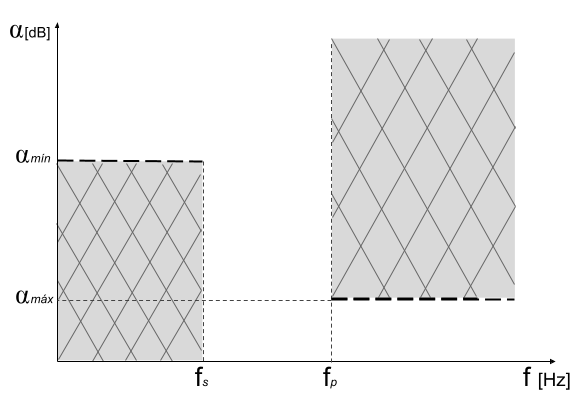
| $\alpha$Max [dB] | $\alpha$mín [dB] | fp [kHz] |fs [kHz]  |
|-----------|-----------|----------|----------|
|     1     |     30    |    40    |10        |

1) Obtener la transferencia de máxima planicidad del filtro requerido.

2) Obtener el diagrama de polos y ceros, y un bosquejo de la respuesta en frecuencia. Compare el diagrama de polos y ceros con el del filtro pasabajo prototipo.

3) Implementar el circuito normalizado con estructuras pasivas. (Puede utilizar dispositivos activos para separar secciones).

4) Reemplace los inductores en las estructuras pasivas mediante el GIC de Antoniou, en la configuración que considere más apropiada.

## Bonus:

+10 💎 Simulación numérica y circuital.
+10  🍺 Presentación en jupyter notebook

# 1)
Tanto el $\epsilon$ como el orden es el mismo para un filtro de alta planicidad pasa altos y pasa bajos por lo tanto vamos a utilizar las mismas expreciones utilizadas la semana pasada:  
$\epsilon² = 10^{\frac{\alpha_{max}}{10}}-1$  
$n = \frac{log(\frac{10^{\alpha_{min}/10}-1}{\epsilon²})}{log(w_p⁻²)}$  
Vamos a normalizar respecto de $w_p$ quedando normalizado de la siguiente forma:  
$w_{pn} = 1 \Rightarrow \Omega_o = 2.\pi.f_p$  
$w_{sn} = 0.25$  
$\epsilon² = 0.26 \Rightarrow \epsilon = 0.508$  
$n = 2.73 = 3$
  
  
Para poder obtner la trasferencia de maxima planicidad de un pasa altos vamos a partir de la $|T(w)|²$ de un pasa bajos:  
$|T_{bajos}(w)|² = \frac{1}{1+\epsilon².w^{2.n}}$  
Para poder adecuar esta trasferencia a la trasferencia de un pasa altos vamos a invertir los omegas:  
$|T_{altos}(w)|² = \frac{1}{1+\epsilon².w^{-2.n}}$  
Luego vamos a normalizar la funcion para que quede un filtro butterworth el cual es mas facil de trabajar analiticamente:  
$|T_{altos}(w_n)|² = \frac{1}{1+w_n^{-2.n}} \Rightarrow w_n = \frac{w}{\Omega_o.\epsilon^{1/n}} = \frac{w}{w_b}$  
Quedando la transferencia de la siguiente forma:  
$|T_{altosn}(w_n)|² = \frac{1}{1+.w_n^{-2.n}}$  
  
$n = 3$  
$|T_{altosn}(w_n)|² = \frac{1}{1+.w_n^{-2.3}} = \frac{1}{1+.w_n^{-6}}$  
$|T_{altosn}(s_n)|² \frac{1}{1+(-1)³.s_n^{-6}}= \frac{1}{1-s_n^{-6}} \Rightarrow s_n = \frac{s}{w_b}$  
$|T_{altosn}(s_n)|² \frac{s_n^{6}}{s_n^{6}-1}$

(1, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

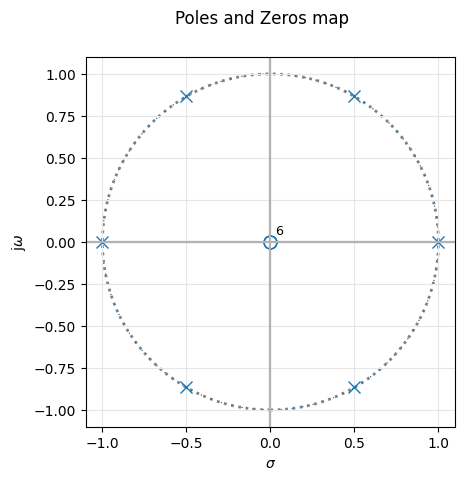

In [6]:
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np

from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot

tff_pa_2 = TransferFunction( [1, 0, 0 ,0 ,0 ,0 ,0 ], [1, 0, 0 ,0 ,0 ,0 ,-1 ] ) # Funcion trasferencia pasa altos |T(sn)|²
pzmap(tff_pa, fig_id=1) #S plane pole/zero plot


Graficamente se puede obserbar que los polos se encuentran equidistante con polos en el eje real por lo que los polos que estamos buscando se encuentra en $\phi_1 = 0 rads$ y $\phi_2 = |\frac{2.\pi}{6}| = \frac{\pi}{3}$. Quedando la trasferencia de la siguiente manera:  
$T(s_n) = \frac{s_n²}{s_n²+2.cos(\phi_2).s_n+1}.\frac{s_n}{s_n+1} = \frac{s_n³}{s_n³+s_n².(1+2.cos(\phi_2))+s_n.(1+cos(\phi_2))+1} = \frac{s_n³}{s_n³+2.s_n²+2.s_n+1}$

# 2)

(3,
 array([<Axes: title={'center': 'Magnitude response'}, ylabel='Magnitude [dB]'>,
        <Axes: title={'center': 'Phase response'}, xlabel='Angular frequency [rad/sec]', ylabel='Phase [rad]'>],
       dtype=object))

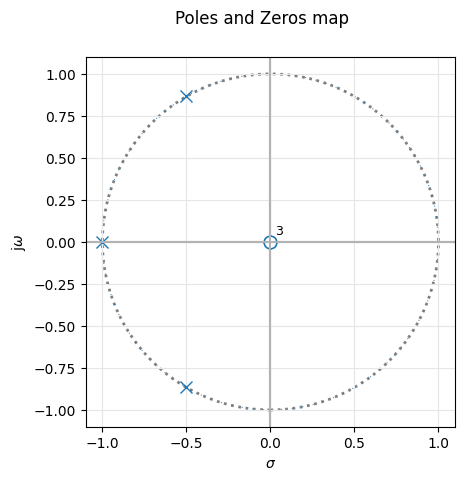

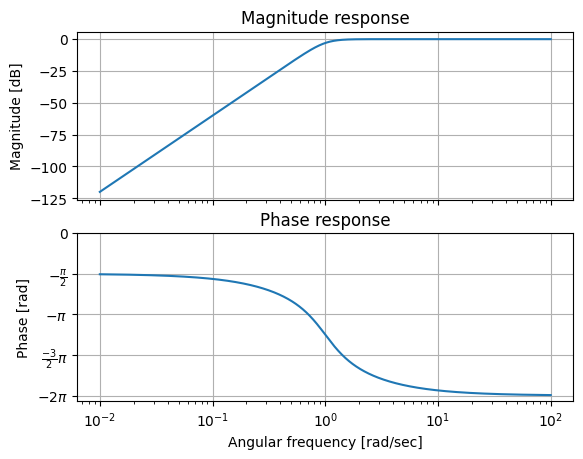

In [22]:
tff_pa_n = TransferFunction( [1, 0 ,0 ,0 ], [1, 2 ,2 ,1 ] ) # Funcion trasferencia pasa altos T(sn)
pzmap(tff_pa_n, fig_id=2) #S plane pole/zero plot
bodePlot(tff_pa_n, fig_id=3)

Para obtener el filtro de alta planicidad tenemos que desnormalizar la transferencia.  
$\Omega_o = 2.\pi.f_p = 251.32 k.s^{-1}$  
$\epsilon^{1/n} = 0.7979$  
$w_b = Omega_o.\epsilon^{1/n} = 200.54 k.s^{-1}$  
$T(s_n) = \frac{s_n³}{s_n³+2.s_n²+2.s_n+1} \Rightarrow s_n = \frac{s}{w_b}$  
$T(s) = \frac{\frac{s³}{w_b³}}{\frac{s³}{w_b³}+2.\frac{s²}{w_b²}+2.\frac{s}{w_b}+1} = \frac{s³}{s³+2.w_b.s²+2.w_b².s+w_b³}$

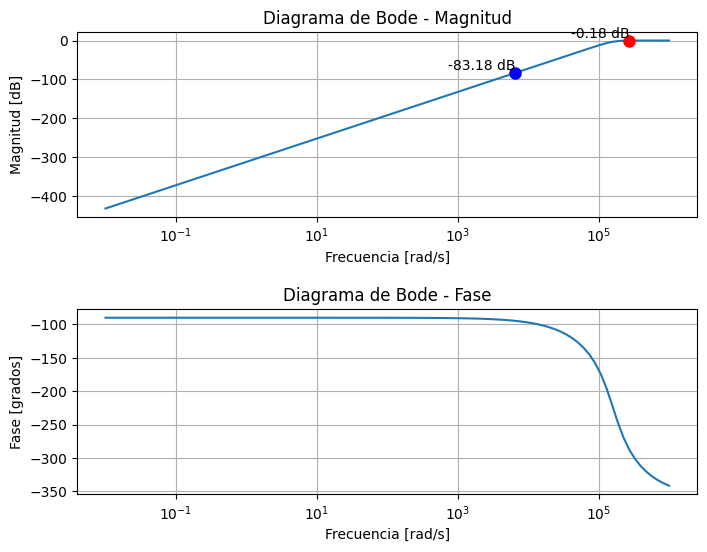

In [20]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri May 19 17:12:19 2023

@author: nico
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

fp = 40*10**3
fs = 10**3
omega = 2*np.pi*fp
epsilon = 0.2588
wb = omega*epsilon**(1/3)

# Definir la función de transferencia
sys = signal.TransferFunction([1, 0 ,0 ,0 ], [1, 2*wb ,2*wb**2 ,wb**3 ])


# Generar el grillado de frecuencias
w, mag, phase = signal.bode(sys)

# Crear la figura y los subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
fig.subplots_adjust(hspace=0.5)

# Graficar la magnitud en dB con grillado
ax1.semilogx(w, mag)
ax1.set_xscale('log')
ax1.set_xlabel('Frecuencia [rad/s]')
ax1.set_ylabel('Magnitud [dB]')
ax1.set_title('Diagrama de Bode - Magnitud')
ax1.grid(True, which="both")

# Marcar wb
idx_1 = np.where(w >= (2*np.pi*fp))[0][0]
mag_marker_1 = mag[idx_1]
ax1.plot(w[idx_1], mag[idx_1], 'ro', markersize=8)
ax1.text(w[idx_1], mag[idx_1], f'{mag_marker_1:.2f} dB', ha='right', va='bottom')

# Marcar Omega0
idx_2 = np.where(w >= (2*np.pi*fs))[0][0]
mag_marker_2 = mag[idx_2]
ax1.plot(w[idx_2], mag[idx_2], 'bo', markersize=8)
ax1.text(w[idx_2], mag[idx_2], f'{mag_marker_2:.2f} dB', ha='right', va='bottom')

# Graficar la fase en grados con grillado
ax2.semilogx(w, phase)
ax2.set_xscale('log')
ax2.set_xlabel('Frecuencia [rad/s]')
ax2.set_ylabel('Fase [grados]')
ax2.set_title('Diagrama de Bode - Fase')
ax2.grid(True, which="both")

# Mostrar la figura
plt.show()

En el grafico se puede observar el filtro pasa altos obtenido y se pueden ver tanto fp como fs y su magnitud en cada punto (fp = rojo, fs = azul).

# Circuito:
## Desarrolo:
Para desarrollar el filtro utilice un pasa altos de 2° orden unido a un pasa altos de 1° orden por un buffer.  
### Transferencia de pasa altos de Segundo orden:  
$T_{2°orden}(s) =\frac{V_{\alpha}}{V_i} = \frac{s²}{s²+s.\frac{R_1}{L}+\frac{1}{C_1.L}}$  
### Transferencia de pasa bajos de Primer orden:  
$T_{1°orden}(s) =\frac{V_{o}}{V_{\alpha}}=\frac{s}{s+\frac{1}{1/C_2.R_2}}$  
### Trasferencia resultante:
$T(s) = T_{1°orden}(s).T_{2°orden}(s) = \frac{V_{o}}{V_{\alpha}}.\frac{V_{\alpha}}{V_i}$  
$T(s)= \frac{s³}{s³+s².(\frac{R_1}{L}+\frac{1}{C_2.R_2})+s.(\frac{1}{L.C_1}+\frac{R_1}{L.C_2.R_2})+\frac{1}{C_1.C_2.R_2.L}}$  



## Circuito Normalizado:
Para normalizar el circuito elegimos los componentes para que tomen los malores de un Butterworth de tercer orden, esto hizo que todos los componentes sean igual a $1$ tanto en el circuito del inductor como en el que se utilizo el Gic.
### Con Inductor:
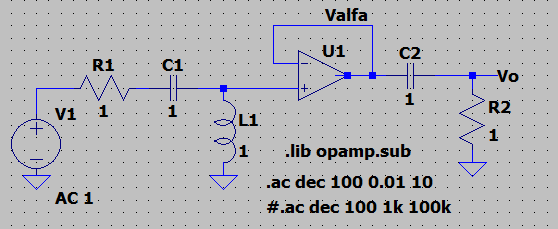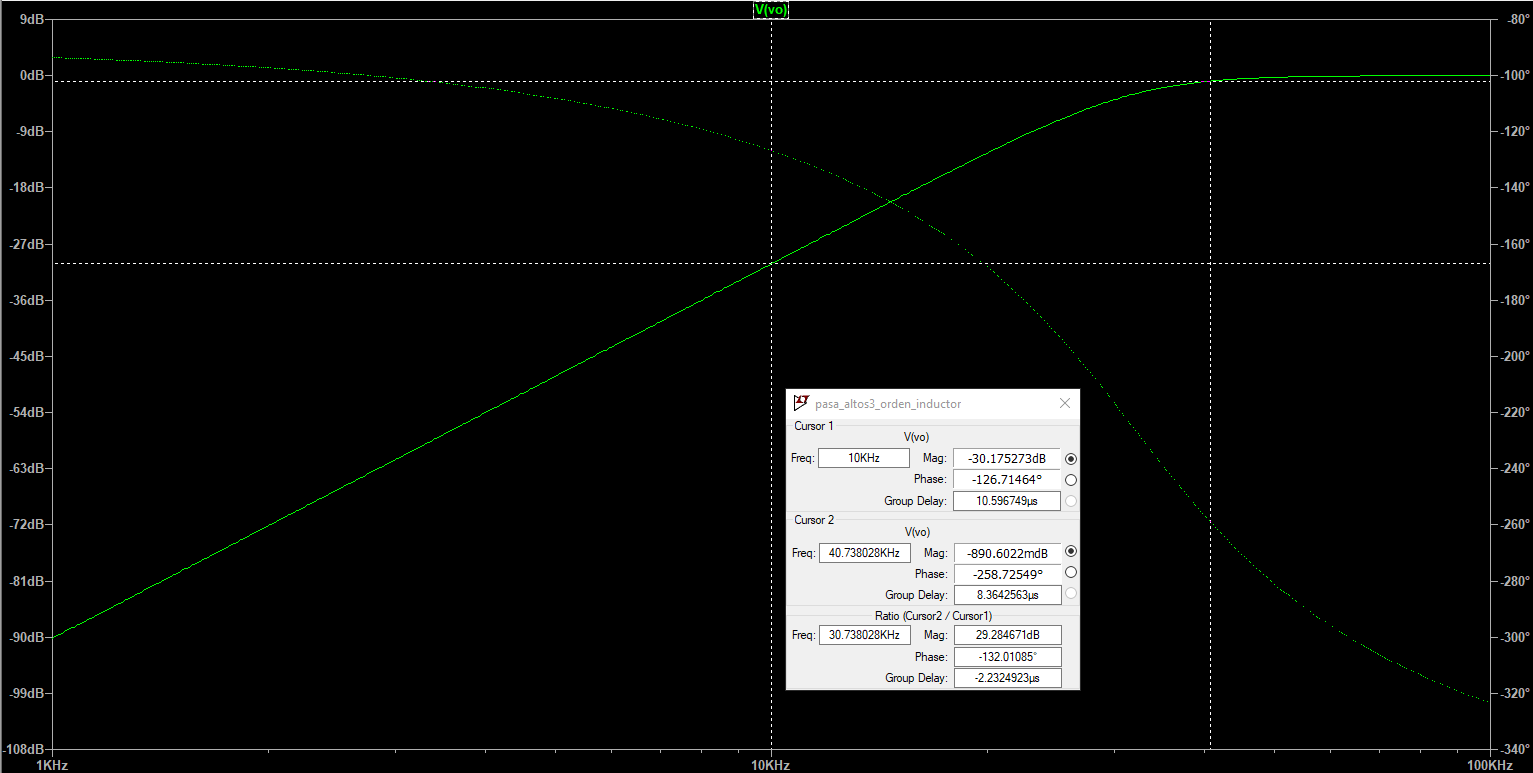

### Con el GIC de Antonio:
Para poder replazar con el inductor con un gic lo unico que hay que hacer es poner un capacitor en una de las impedanciad pares y poner resistencias en el resto del gic.
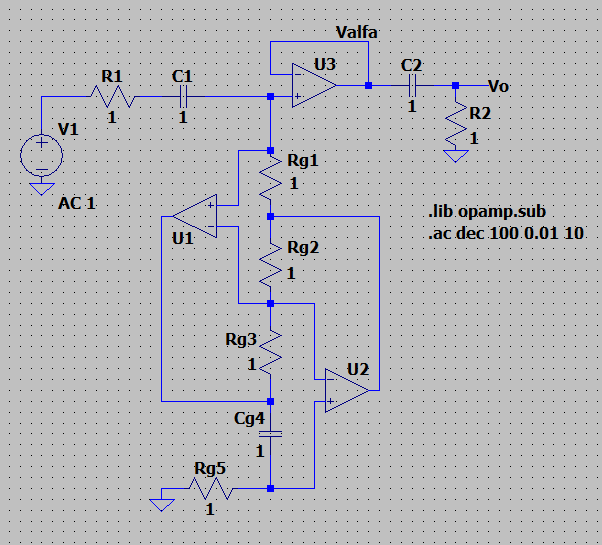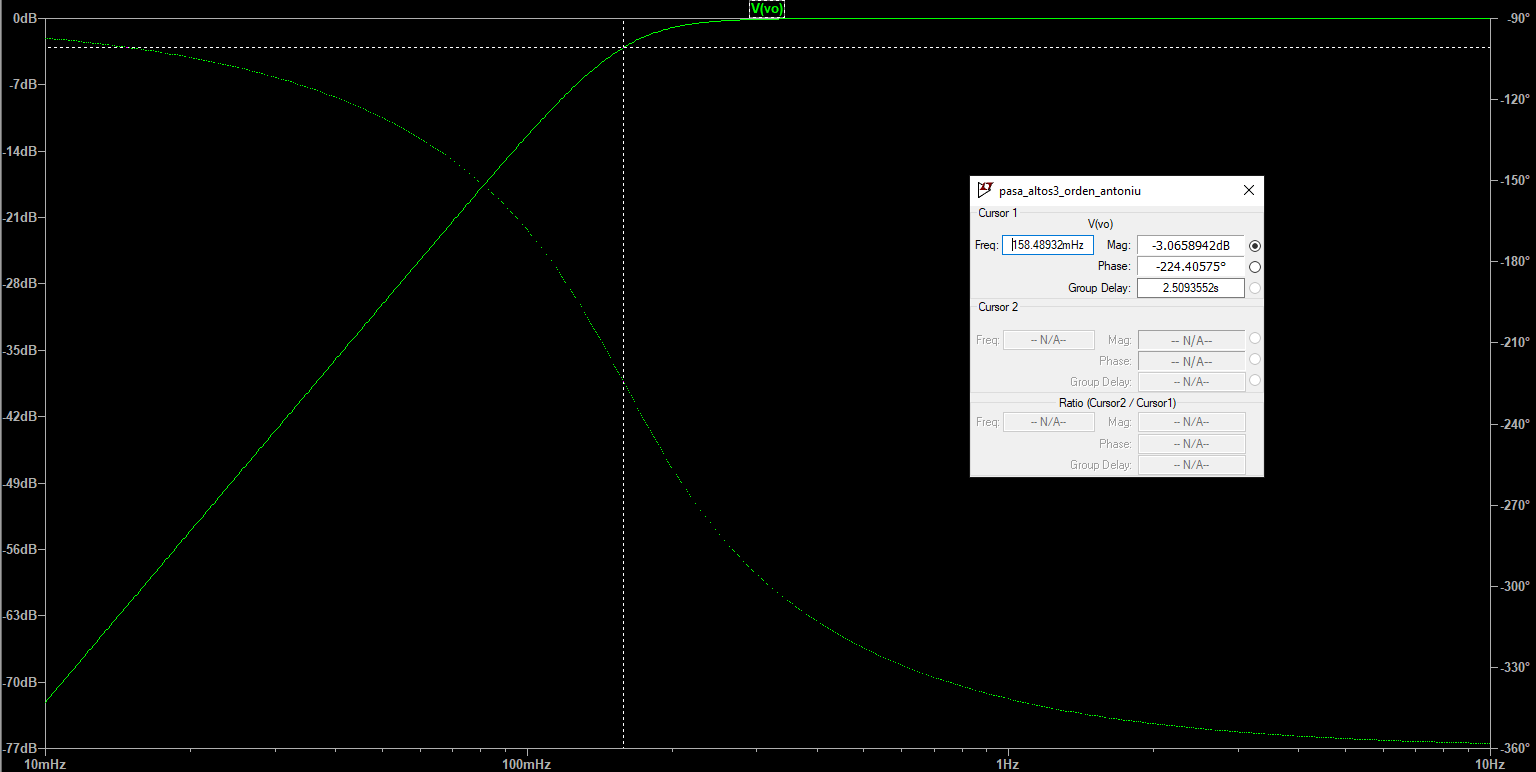

## Circuito desnormalizado:
$w_b = Omega_o.\epsilon^{1/n} = 200.54 k.s^{-1}$  
$R_1 = R_2 = R = R_o.R_{n} ; C_1 = C_2 = C = \frac{C_n}{w_b.R_o} ; L = L_n.\frac{R_o}{w_b}$  
$R_o = 1k \Omega$  
$C = 5.nF$  
$L = 5 mH$
### Con inductor:
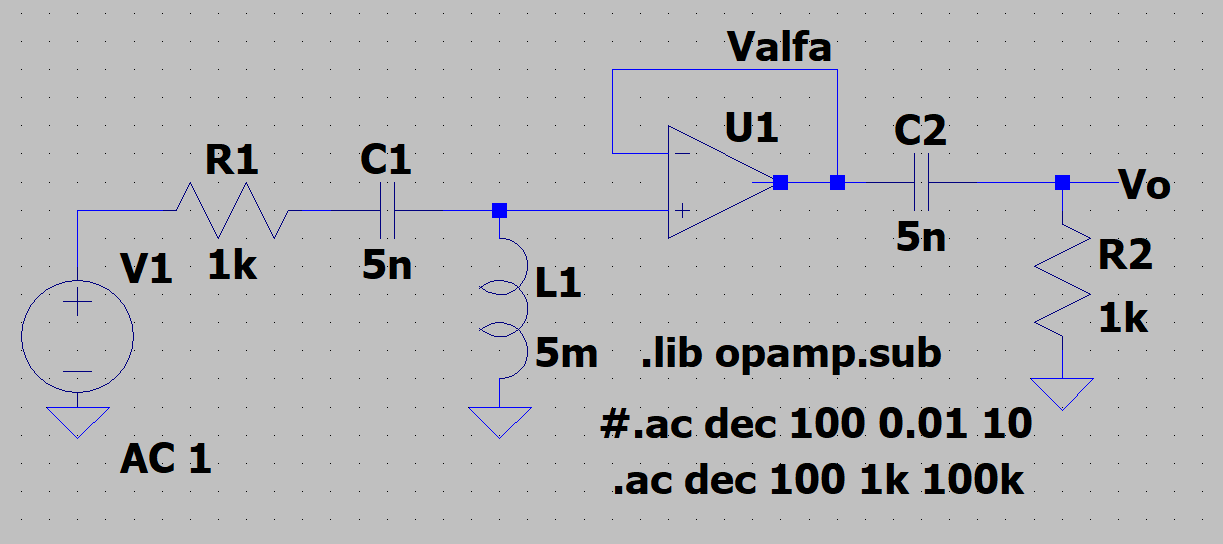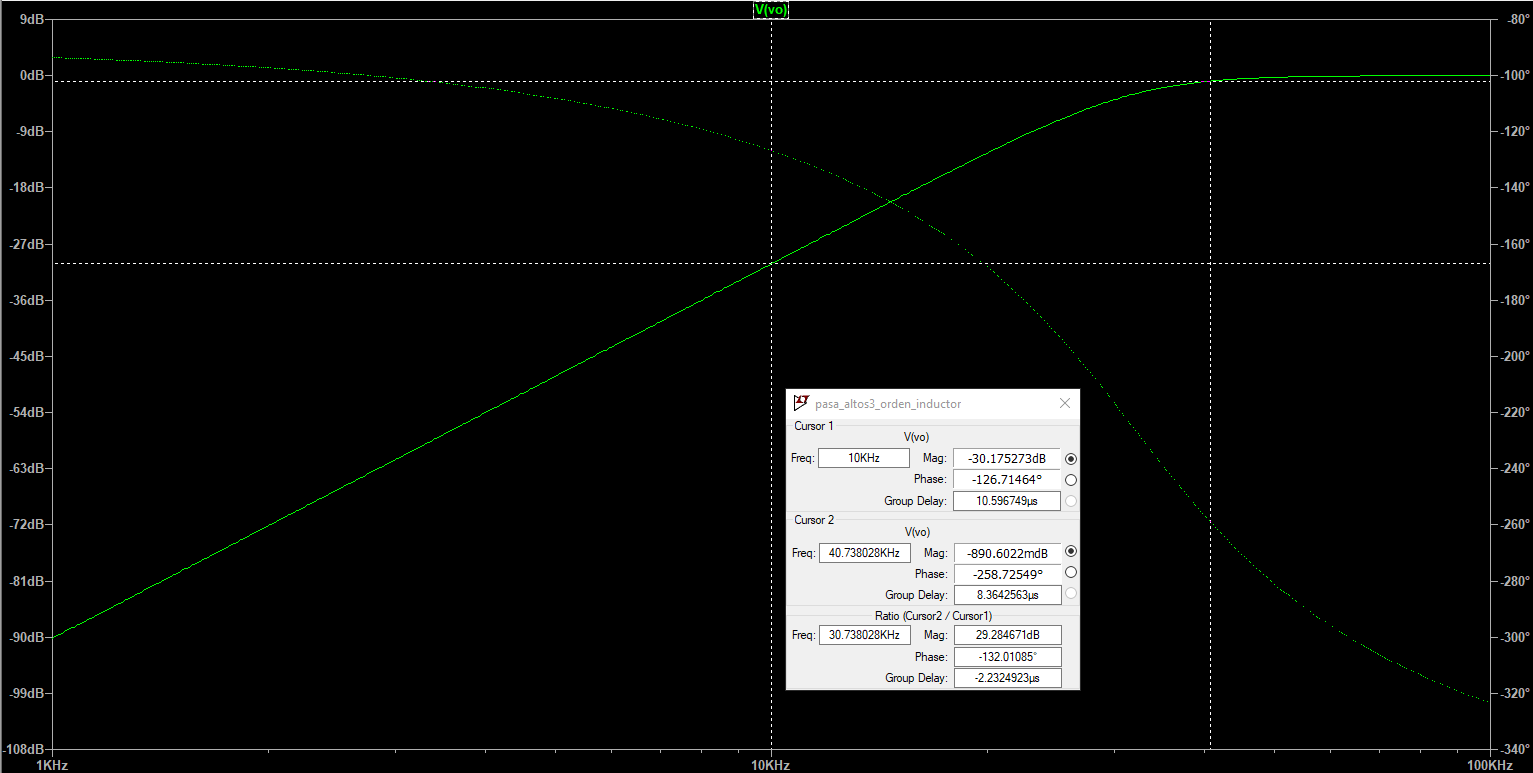

### Con el GIC de Antonio:
Para poder calcular las resistencia que utlizamos en el gic debemos saber que $s.L = \frac{Z_1.Z_3.Z_5}{Z_2.Z_4}$. Nosotros pusimos una capacitor en $Z_4$ y resistencias de igual valor en las impedancias impares quedando la igualdad de la siguiente forma: $s.L = \frac{s.C_{g4}.R_{g1}³}{R_{g2}}$. Para facilitar el diseño consideramos a $C_{g4} = C = 5nF$ quedando de esta forma las resistencias $R_{g1} = R_{g2} = R = 1k \Omega$
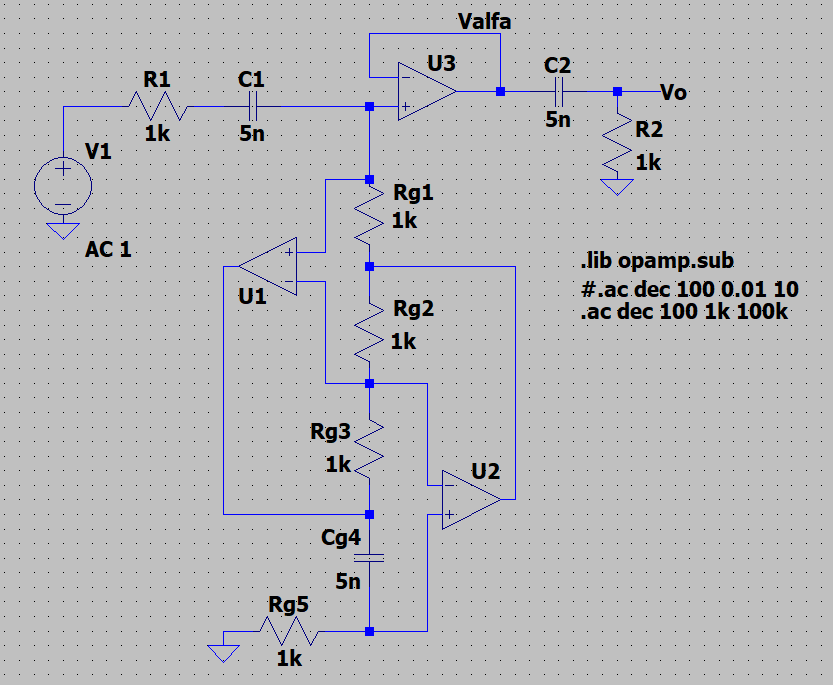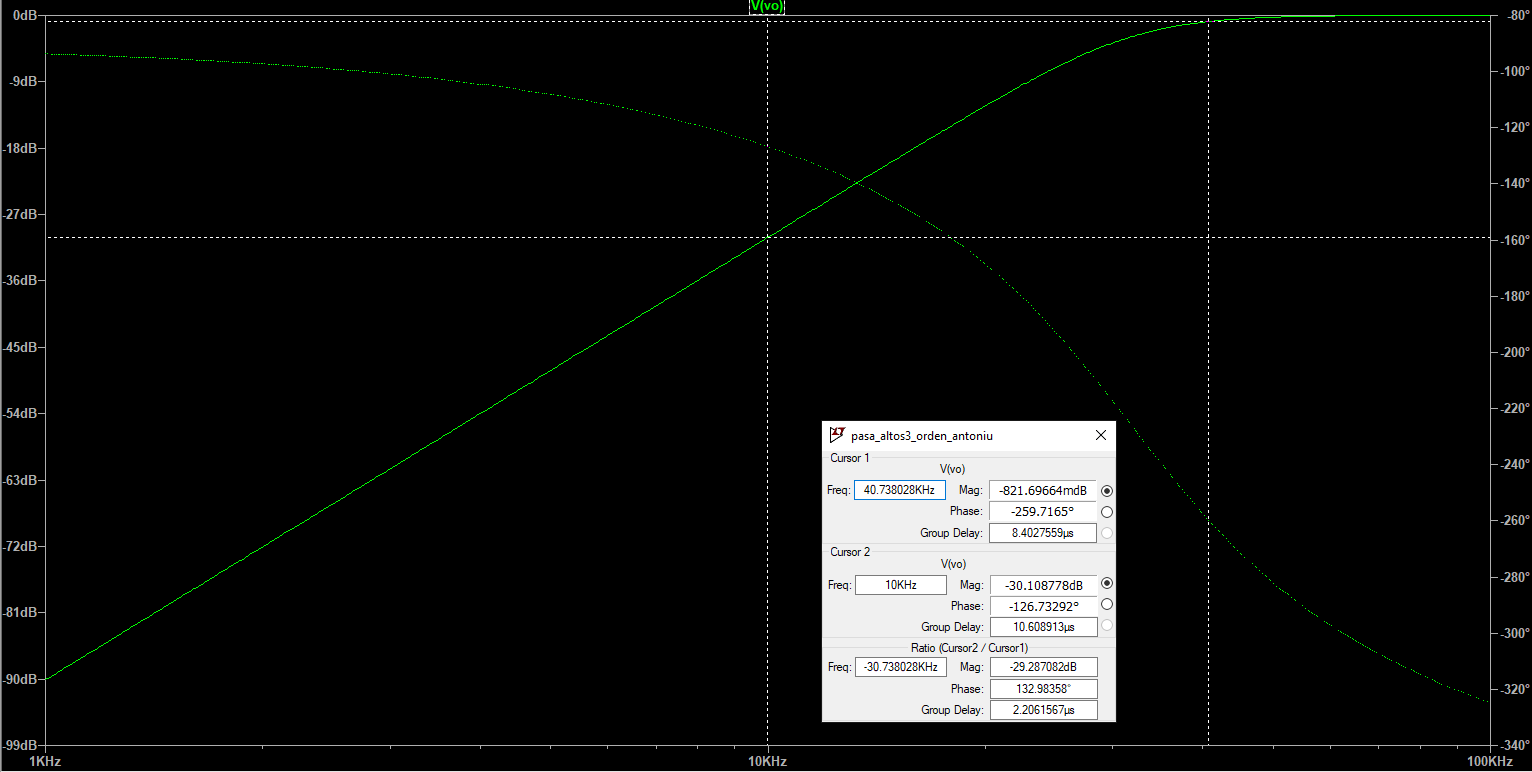